In [61]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

In [62]:
# Read the Mouse and Drug Data and the Clinical Trial Data

mouse_df = pd.read_csv(mouse_drug_data_to_load)
trial_df = pd.read_csv(clinical_trial_data_to_load)


In [63]:
# mouse_df.head()
# trial_df.head()

In [64]:
# Combine the data into a single dataset

mouse_trial_df = pd.merge(mouse_df, trial_df, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mouse_trial_df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [65]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_avg_df = mouse_trial_df.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].mean().reset_index()

# Convert to DataFrame

# Preview DataFrame
tumor_avg_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [66]:
# Minor Data Munging to Re-Format the Data Frames
tumor_avg_pivot_df = tumor_avg_df.pivot_table(values = "Tumor Volume (mm3)", 
                           index = ["Timepoint"],columns = 'Drug' ).reset_index("Timepoint")
# Preview that Reformatting worked
tumor_avg_pivot_df.head()

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
1,5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
2,10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
3,15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
4,20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [68]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_sem_df = mouse_trial_df.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].sem().reset_index()

# Convert to DataFrame

# Preview DataFrame
tumor_sem_df.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [69]:
# Minor Data Munging to Re-Format the Data Frames
tumor_sem_pivot_df = tumor_sem_df.pivot_table(values = "Tumor Volume (mm3)", 
                           index = ["Timepoint"],columns = 'Drug' )

# Preview that Reformatting worked
tumor_sem_pivot_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


In [31]:
# colors = ["red", "brown", "green", "cyan", "magenta", "yellow", "black", "blue", "pink", "orange"]
# markers = ['1', 'o', 'v', '^', 's', 'p', '*', '+', 'd', 'x']
# x = tumor_avg_pivot_df["Timepoint"].tolist()
# # drug_names_list = tumor_avg_pivot_df.columns[1:].tolist()
# # drug_names_list
# drugs = [Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol]
# # colors = colors[:3]
# labels = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol","Placebo","Propriva","Ramicane","Stelasyn","Zoniferol"]

# plt.figure(figsize=(10,5))
# plt.title("Tumor Response to Treatment")
# plt.xlabel("Time (Days)")
# plt.ylabel("Tumor Volume (mm3)")


# for i in range(10):
#     line1, = plt.plot(x ,drugs[i], color=colors[i], label=labels[i], marker = markers[i], linestyle="dotted" )
#     line2 = plt.errorbar(a,b,yerr=c, linestyle="None")
 
# plt.show()
    

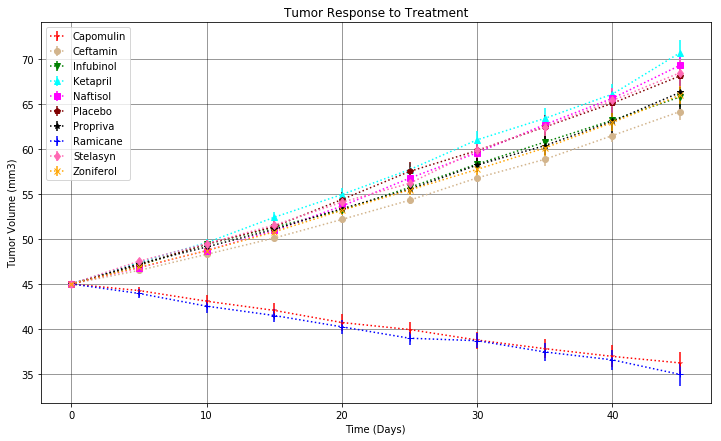

In [74]:
###################################### For TA ######################################
# I do not know why but for plt.plot does not work when inside the for loop. I showed my code to TTH TA, his opinion
# was we can not use plt inside loop. I did multiple tries to do my task inside for but all vain. One of my attempt 
# is commented out above this block. 
# There is too much repetition in the below code because I was able to make loop work for my situation.
###################################################################################

x = tumor_avg_pivot_df["Timepoint"]

# get Y values
Capomulin = tumor_avg_pivot_df["Capomulin"]
Ceftamin = tumor_avg_pivot_df["Ceftamin"]
Infubinol = tumor_avg_pivot_df["Infubinol"]
Ketapril = tumor_avg_pivot_df["Ketapril"]
Naftisol = tumor_avg_pivot_df["Naftisol"]
Placebo = tumor_avg_pivot_df["Placebo"]
Propriva = tumor_avg_pivot_df["Propriva"]
Ramicane = tumor_avg_pivot_df["Ramicane"]
Stelasyn = tumor_avg_pivot_df["Stelasyn"]
Zoniferol = tumor_avg_pivot_df["Zoniferol"]

# get Y-Err values
SemCapomulin = tumor_sem_pivot_df["Capomulin"]
SemCeftamin = tumor_sem_pivot_df["Ceftamin"]
SemInfubinol = tumor_sem_pivot_df["Infubinol"]
SemKetapril = tumor_sem_pivot_df["Ketapril"]
SemNaftisol = tumor_sem_pivot_df["Naftisol"]
SemPlacebo = tumor_sem_pivot_df["Placebo"]
SemPropriva = tumor_sem_pivot_df["Propriva"]
SemRamicane = tumor_sem_pivot_df["Ramicane"]
SemStelasyn = tumor_sem_pivot_df["Stelasyn"]
SemZoniferol = tumor_sem_pivot_df["Zoniferol"]

plt.figure(figsize=(12,7))
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid(b=True, which='major', color='black', linestyle='-', alpha=0.5)


plt.errorbar(x,Capomulin,SemCapomulin, color="red", label="Capomulin", linestyle="dotted", marker ="1")
plt.errorbar(x,Ceftamin, SemCeftamin, color="tan", label="Ceftamin", linestyle="dotted", marker ="o")

plt.errorbar(x,Infubinol, SemInfubinol,color="green", label="Infubinol", linestyle="dotted", marker ="v")
plt.errorbar(x,Ketapril, SemKetapril,color="cyan", label="Ketapril", linestyle="dotted", marker ="^")

plt.errorbar(x,Naftisol, SemNaftisol,color="magenta", label="Naftisol", linestyle="dotted", marker ="s")
plt.errorbar(x,Placebo, SemPlacebo,color="maroon", label="Placebo", linestyle="dotted", marker ="p")

plt.errorbar(x,Propriva, SemPropriva,color="black", label="Propriva", linestyle="dotted", marker ="*")
plt.errorbar(x,Ramicane, SemRamicane,color="blue", label="Ramicane", linestyle="dotted", marker ="+")

plt.errorbar(x,Stelasyn, SemStelasyn, color="hotpink", label="Stelasyn", linestyle="dotted", marker ="d")
plt.errorbar(x,Zoniferol, SemZoniferol, color="orange", label="Zoniferol", linestyle="dotted", marker ="x")

plt.legend(handlelength=1.5)

plt.savefig('data/TumorResponseToTreatment.png') 

plt.show()

## Metastatic Response to Treatment

In [75]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
met_site_avg_df = mouse_trial_df.groupby(["Drug","Timepoint"])["Metastatic Sites"].mean().reset_index()

# Convert to DataFrame

# Preview DataFrame
met_site_avg_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [86]:
# Minor Data Munging to Re-Format the Data Frames
met_site_pivot_df = met_site_avg_df.pivot_table(values = "Metastatic Sites", 
                           index = ["Timepoint"],columns = 'Drug' ).reset_index()

# Preview that Reformatting worked
met_site_pivot_df.head()

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
2,10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
3,15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
4,20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [87]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
met_site_sem_df = mouse_trial_df.groupby(["Drug","Timepoint"])["Metastatic Sites"].sem().reset_index()

# Convert to DataFrame

# Preview DataFrame
met_site_sem_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [78]:
# Minor Data Munging to Re-Format the Data Frames
met_site_sem_pivot_df = met_site_sem_df.pivot_table(values = "Metastatic Sites", 
                           index = ["Timepoint"],columns = 'Drug' ).reindex()

# Preview that Reformatting worked
met_site_sem_pivot_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


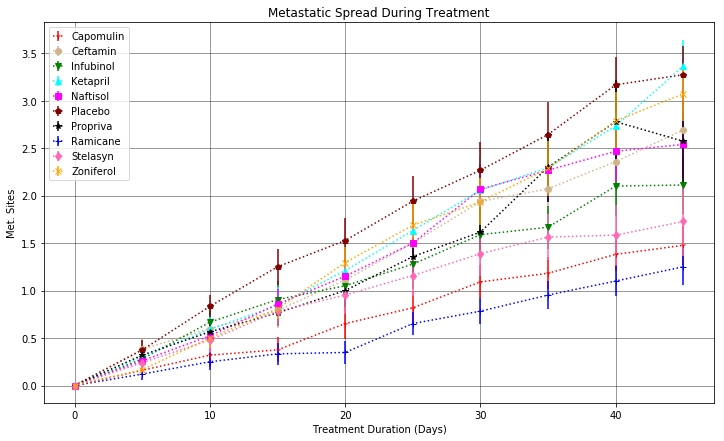

In [88]:
# Generate the Plot (with Error Bars)
x = met_site_pivot_df["Timepoint"]

CapomulinMS = met_site_pivot_df["Capomulin"]
CeftaminMS = met_site_pivot_df["Ceftamin"]
InfubinolMS = met_site_pivot_df["Infubinol"]
KetaprilMS = met_site_pivot_df["Ketapril"]
NaftisolMS = met_site_pivot_df["Naftisol"]
PlaceboMS = met_site_pivot_df["Placebo"]
ProprivaMS = met_site_pivot_df["Propriva"]
RamicaneMS = met_site_pivot_df["Ramicane"]
StelasynMS = met_site_pivot_df["Stelasyn"]
ZoniferolMS = met_site_pivot_df["Zoniferol"]

SemCapomulinMS = met_site_sem_pivot_df["Capomulin"]
SemCeftaminMS = met_site_sem_pivot_df["Ceftamin"]
SemInfubinolMS = met_site_sem_pivot_df["Infubinol"]
SemKetaprilMS = met_site_sem_pivot_df["Ketapril"]
SemNaftisolMS = met_site_sem_pivot_df["Naftisol"]
SemPlaceboMS = met_site_sem_pivot_df["Placebo"]
SemProprivaMS = met_site_sem_pivot_df["Propriva"]
SemRamicaneMS = met_site_sem_pivot_df["Ramicane"]
SemStelasynMS = met_site_sem_pivot_df["Stelasyn"]
SemZoniferolMS = met_site_sem_pivot_df["Zoniferol"]

plt.figure(figsize=(12,7))
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")
plt.grid(b=True, which='major', color='black', linestyle='-',alpha=0.5)


plt.errorbar(x,CapomulinMS,SemCapomulinMS, color="red", label="Capomulin", linestyle="dotted", marker ="1", fmt="s")
plt.errorbar(x,CeftaminMS, SemCeftaminMS, color="tan", label="Ceftamin", linestyle="dotted", marker ="o")

plt.errorbar(x,InfubinolMS, SemInfubinolMS, color="green", label="Infubinol", linestyle="dotted", marker ="v")
plt.errorbar(x,KetaprilMS, SemKetaprilMS, color="cyan", label="Ketapril", linestyle="dotted", marker ="^")

plt.errorbar(x,NaftisolMS, SemNaftisolMS, color="magenta", label="Naftisol", linestyle="dotted", marker ="s")
plt.errorbar(x,PlaceboMS, SemPlaceboMS, color="maroon", label="Placebo", linestyle="dotted", marker ="p")

plt.errorbar(x,ProprivaMS, SemProprivaMS, color="black", label="Propriva", linestyle="dotted", marker ="*")
plt.errorbar(x,RamicaneMS, SemRamicaneMS, color="blue", label="Ramicane", linestyle="dotted", marker ="+")

plt.errorbar(x,StelasynMS, SemStelasynMS, color="hotpink", label="Stelasyn", linestyle="dotted", marker ="d")
plt.errorbar(x,ZoniferolMS, SemZoniferolMS, color="orange", label="Zoniferol", linestyle="dotted", marker ="x")

plt.legend(handlelength=1.)


# Save the Figure
plt.savefig('data/MetasticSpreadDuringTreatment.png') 

# Show the Figure
plt.show()

## Survival Rates

In [96]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_cnt_df = mouse_trial_df.groupby(["Drug","Timepoint"])["Mouse ID"].count().reset_index().rename(columns={"Mouse ID":"Mouse Count"})

# Convert to DataFrame

# Preview DataFrame
mouse_cnt_df.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [97]:
# Minor Data Munging to Re-Format the Data Frames
mouse_cnt_pivot_df = mouse_cnt_df.pivot_table(values = "Mouse Count", 
                           index = ["Timepoint"],columns = 'Drug' )

# Preview the Data Frame
mouse_cnt_pivot_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [103]:
# Generate the Plot (Accounting for percentages)
mouse_cnt_per_df = mouse_cnt_pivot_df.apply(lambda x:100 * x / float(x.max())).reset_index()

mouse_cnt_per_df.head()

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,100.0,100.0,100.0,100.0,100.0,100.0,100.000000,100.0,100.000000,100.0
1,5,100.0,84.0,100.0,92.0,92.0,96.0,96.153846,100.0,96.153846,96.0
2,10,100.0,80.0,84.0,88.0,84.0,96.0,88.461538,96.0,88.461538,88.0
3,15,96.0,76.0,84.0,76.0,84.0,80.0,65.384615,96.0,88.461538,84.0
4,20,92.0,72.0,80.0,76.0,80.0,76.0,65.384615,92.0,80.769231,68.0


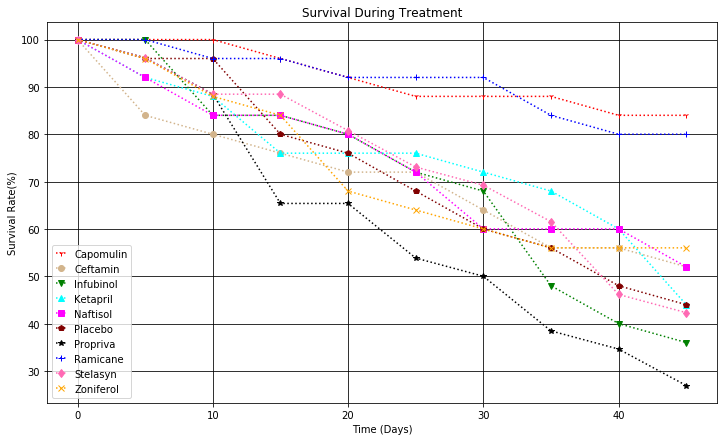

In [104]:

xPer = mouse_cnt_per_df["Timepoint"]

CapomulinPer = mouse_cnt_per_df["Capomulin"]
CeftaminPer = mouse_cnt_per_df["Ceftamin"]
InfubinolPer = mouse_cnt_per_df["Infubinol"]
KetaprilPer = mouse_cnt_per_df["Ketapril"]
NaftisolPer = mouse_cnt_per_df["Naftisol"]
PlaceboPer = mouse_cnt_per_df["Placebo"]
ProprivaPer = mouse_cnt_per_df["Propriva"]
RamicanePer = mouse_cnt_per_df["Ramicane"]
StelasynPer = mouse_cnt_per_df["Stelasyn"]
ZoniferolPer = mouse_cnt_per_df["Zoniferol"]

plt.figure(figsize=(12,7))
plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate(%)")
plt.grid(b=True, which='major', color='black', linestyle='-')


plt.plot(xPer,CapomulinPer, color="red", label="Capomulin", linestyle="dotted", marker ="1")
plt.plot(xPer,CeftaminPer, color="tan", label="Ceftamin", linestyle="dotted", marker ="o")

plt.plot(xPer,InfubinolPer, color="green", label="Infubinol", linestyle="dotted", marker ="v")
plt.plot(xPer,KetaprilPer, color="cyan", label="Ketapril", linestyle="dotted", marker ="^")

plt.plot(xPer,NaftisolPer, color="magenta", label="Naftisol", linestyle="dotted", marker ="s")
plt.plot(xPer,PlaceboPer, color="maroon", label="Placebo", linestyle="dotted", marker ="p")

plt.plot(xPer,ProprivaPer, color="black", label="Propriva", linestyle="dotted", marker ="*")
plt.plot(xPer,RamicanePer, color="blue", label="Ramicane", linestyle="dotted", marker ="+")

plt.plot(xPer,StelasynPer, color="hotpink", label="Stelasyn", linestyle="dotted", marker ="d")
plt.plot(xPer,ZoniferolPer, color="orange", label="Zoniferol", linestyle="dotted", marker ="x")

plt.legend(handlelength=1.)

# Save the Figure
plt.savefig('data/SurvivalDuringTreatment.png')

# Show the Figure
plt.show()

## Summary Bar Graph

In [105]:
# Calculate the percent changes for each drug
first_last_df = tumor_avg_pivot_df.iloc[[0, -1]]

first_last_df = first_last_df.pct_change().iloc[-1] * 100


# Display the data to confirm
first_last_df.head()

Drug
Timepoint          inf
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Name: 9, dtype: float64

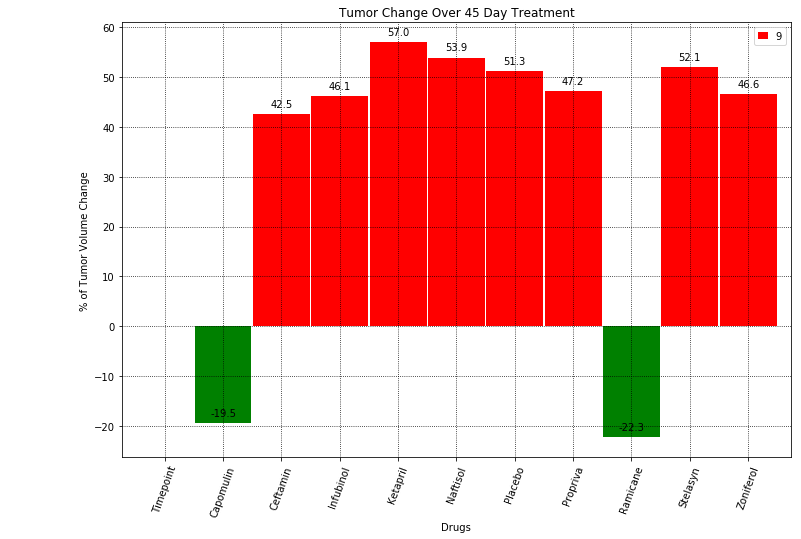

In [112]:
# Store all Relevant Percent Changes into a Tuple
first_last_list = (list(zip(first_last_df,first_last_df.index)))
plt.figure(figsize=(12, 8))
ax = first_last_df.plot(kind='bar', width=.975,
                       color = ['red' if [val[0] for val in first_last_list][i] > 0 
                                else 'green' for i in np.arange(len(first_last_list))])

# Orient widths. Add labels, tick marks, etc. 
ax.set_title("Tumor Change Over 45 Day Treatment")
ax.set_xlabel("Drugs")
ax.set_ylabel("% of Tumor Volume Change")
x_labels = pd.Series((v[1] for v in first_last_list))
ax.set_xticklabels(x_labels)
plt.grid(b=True, which='major', color='black', linestyle=':')
plt.xticks(rotation=70)
plt.legend(handlelength=1.)

# Use functions to label the percentages of changes
def add_labels(axs, spacing=5):

    for xy in axs.patches:

        y_value = xy.get_height()
        x_value = xy.get_x() + xy.get_width() / 2

        space = spacing
        va = 'bottom'
        label = "{:.1f}".format(y_value)

        ax.annotate(
            label,                      # label
            (x_value, y_value),         # Place label
            xytext=(0, space),          # shift label by 'space' vertically 
            textcoords="offset points", # offset in points
            ha='center',                # center label horizontally
            va=va)
        
# Call functions to implement the function calls
add_labels(ax)
   
# Save the Figure
plt.savefig('data/TumorChangeOver45DayTreatment.png')

# Show the Figure
plt.show()
